# creating data to view and fit

In [10]:
from sklearn.datasets import make_circles
import tensorflow as tf

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [11]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [12]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [13]:
import pandas as pd
# converting to a dataframe 
circle = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "labels":y})
circle

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


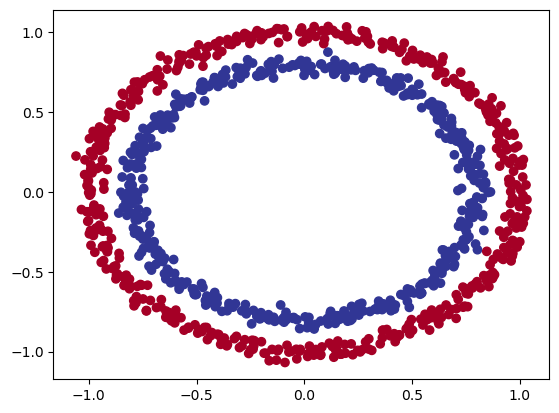

In [14]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [15]:
# check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# How many samples we're working with 
len(X), len(y)

(1000, 1000)

In [17]:
# view the first exaple of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


### Improve model

In [19]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [20]:
# Adding an extra layer

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [21]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

here we can see that out model is not improve 

### Improve model 2<br>
change activation function

In [22]:
#set random state
tf.random.set_seed=42

#create a model with 2 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
    
])

#compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [23]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5100


[0.700622022151947, 0.5099999904632568]

So after increasing hidden layers model is not performing well so to know the problem we can visualize the predictions 

# Visualize prediction

To visualize our model's predictions, let's create a function

In [24]:
model_3.predict(X)

array([[0.4818689 ],
       [0.5713936 ],
       [0.57646966],
       [0.5852168 ],
       [0.42498642],
       [0.5894959 ],
       [0.56884205],
       [0.47510996],
       [0.47037953],
       [0.59039986],
       [0.5169883 ],
       [0.53504014],
       [0.5772783 ],
       [0.44486037],
       [0.4359962 ],
       [0.44984284],
       [0.5490771 ],
       [0.45305213],
       [0.5580568 ],
       [0.50332075],
       [0.5046836 ],
       [0.6067041 ],
       [0.44733655],
       [0.48595604],
       [0.60159737],
       [0.5858773 ],
       [0.561947  ],
       [0.45126218],
       [0.445362  ],
       [0.44069985],
       [0.47201732],
       [0.59490234],
       [0.5661165 ],
       [0.45128044],
       [0.44677535],
       [0.6096233 ],
       [0.58788455],
       [0.5338147 ],
       [0.44654506],
       [0.510216  ],
       [0.49855703],
       [0.5543442 ],
       [0.5123343 ],
       [0.44484326],
       [0.52647036],
       [0.5469732 ],
       [0.43393123],
       [0.552

In [23]:
import numpy as np

In [25]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


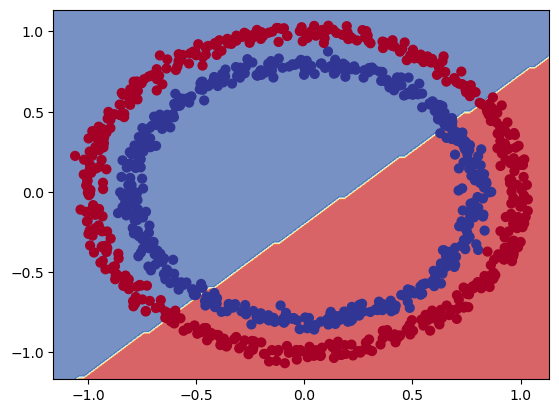

In [26]:
# check out the prediction that our model making 
plot_decision_boundary(model=model_3, X=X, y=y)

So from this we can see that our model is not a non-linear data so we can't do predictions using linear(straight line)

# Inroducing non-linearity to our model<br>
More hidden layers<br>
activation function<br>
optimizers

In [27]:
#set random state
tf.random.set_seed=42

#create a model with 2 layers
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

#fit model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6892 - accuracy: 0.5250
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5210
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5460
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.9790
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.9830
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.9840
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.9780
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.9840
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.9850
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.9850
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.9850
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.9880
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.9890
Epoch 93/100


In [28]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.9930


[0.2696569263935089, 0.9929999709129333]

doing binary classifcation...


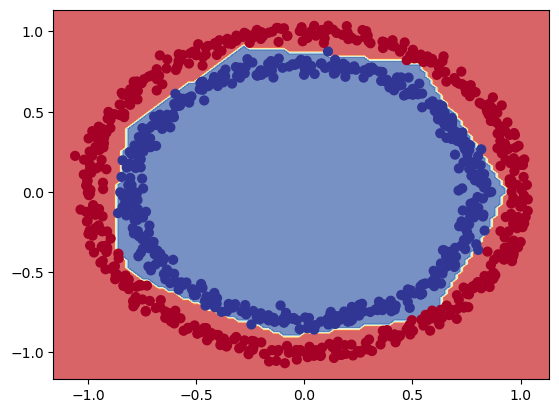

In [29]:
plot_decision_boundary(model_5, X, y)

Here we use same data for training and testin we never use this, so we need to split our data in to test data and train data